# THESIS - Multiple items characterisation - Fisher Information

Collection of random plots for chapter 5.

Other plots for this chapter come from: [fisherinfo_new_2016/notebook_fisher_fits_2016.ipynb](../fisherinfo_new_2016/notebook_fisher_fits_2016.ipynb)



In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [14]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import functools
from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import plots_experimental_data

import re
import inspect
import imp

import utils
import load_experimental_data
import highdimensionnetwork
import hierarchicalrandomnetwork

import computations_marginalfisherinfo_marginalposterior_2d_nstim
import computations_marginalfisherinfo_marginalposterior_2d

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

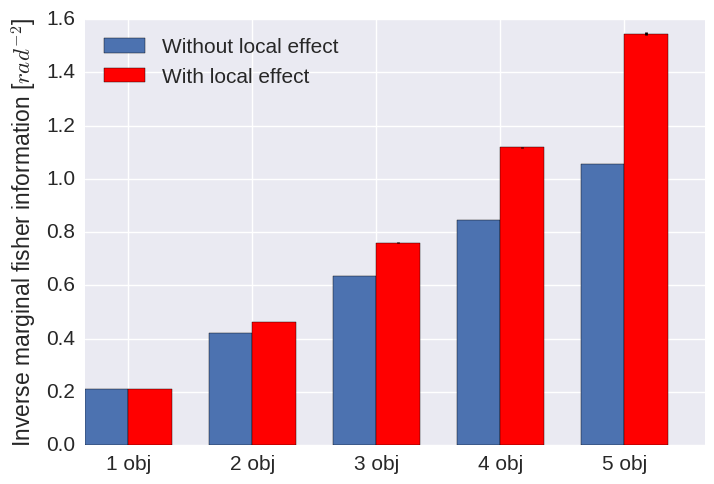

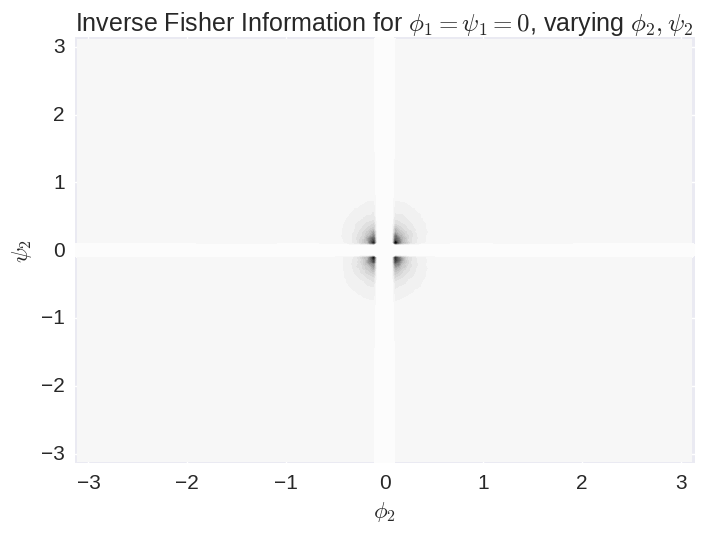

In [34]:
with io.capture_output(display=False, stdout=True) as captured:
    all_vars = computations_marginalfisherinfo_marginalposterior_2d_nstim.main(to_plot=[2])

In [14]:
dataio = DataIO(label='marginal_fisher_information', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Experiments/thesis_plots/multiple_objects')

=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Experiments/thesis_plots/multiple_objects/marginal_fisher_information-d17b0e1b-e22f-4633-94a8-0d80518e6359 ===


In [7]:
item2_positions = np.array(all_vars['item2_positions'])
all_inv_FI_2obj = np.array(all_vars['all_inv_FI_2obj'])

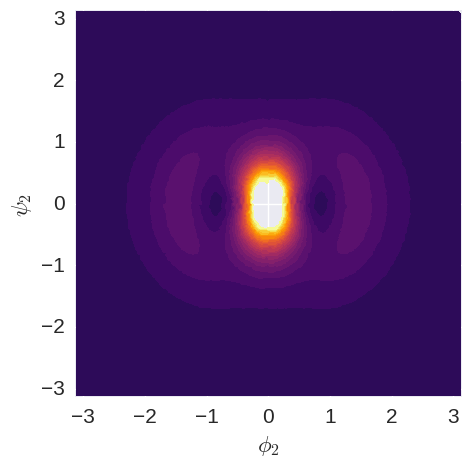

In [33]:
min_distance = 0.001

cmap = plt.cm.get_cmap("inferno") #bone_r
cmap.set_under("magenta")
cmap.set_over("yellow")


min_distance_fct = lambda x, min_distance=0.1: np.abs(x) < min_distance
min_distance_fct_part = functools.partial(
    min_distance_fct, min_distance=min_distance)

levels = np.logspace(-0.5, 0.3, 30)

f, ax = plt.subplots(figsize=(5, 5))
utils.contourf_interpolate_data(
    item2_positions,
    all_inv_FI_2obj,
    xlabel='$\phi_2$',
    ylabel='$\psi_2$',
#     title='Inverse Fisher Information for $\phi_1 = \psi_1 = 0$, varying $\phi_2, \psi_2$',
    show_colorbar=False,
    show_scatter=False,
#     mask_x_condition=min_distance_fct_part,
#     mask_y_condition=min_distance_fct_part,
    interpolation_method='nearest', 
#     contour_numlevels=20,
    log_scale=True,
    levels=levels,
    ax_handle=ax,
    cmap=cmap
)
# plt.axis('equal')


# f.savefig(dataio.create_formatted_filename('contourf_log_2items_{label}_{unique_id}.pdf'))

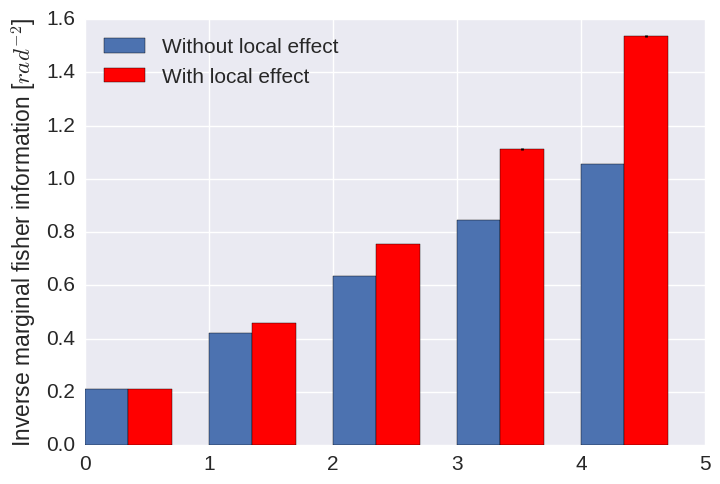

In [29]:
n_items = all_vars['n_items']
FI_all_obj_cum = all_vars['FI_all_obj_cum']
inv_FI_all_obj_var_cum = all_vars['inv_FI_all_obj_var_cum']
FI_all_obj_var_cum = all_vars['FI_all_obj_var_cum']
inv_FI_allobj_cum = all_vars['inv_FI_allobj_cum']
n_samples = all_vars['n_samples']
i = all_vars['i']


f2, ax2 = plt.subplots()
width = 0.35
rects1 = ax2.bar(
    np.arange(n_items),
    (FI_all_obj_cum * n_samples / (i + 1.)),
    width=width,
    yerr=np.sqrt(FI_all_obj_var_cum * n_samples /
                 (i + 1.)) / np.sqrt(i + 1),
    error_kw=dict(elinewidth=2, ecolor='black'))
rects2 = ax2.bar(
    np.arange(n_items) + width,
    inv_FI_allobj_cum * n_samples / (i + 1),
    width=width,
    yerr=np.sqrt(inv_FI_all_obj_var_cum * n_samples /
                 (i + 1)) / np.sqrt(i + 1),
    color='r',
    error_kw=dict(elinewidth=2, ecolor='black'))
ax2.set_xticks(
    np.arange(n_items) + width,
    ['%d obj' % it for it in xrange(1, n_items + 1)])
# plt.errorbar(np.arange(1, n_items+1), inv_FI_allobj_cum, yerr=inv_FI_all_obj_var_cum, fmt='.')
ax2.legend(
    (rects1[0], rects2[0]),
    ('Without local effect', 'With local effect'),
    loc='best')
ax2.set_ylabel('Inverse marginal fisher information [$rad^{-2}$]')


# dataio.save_current_figure(
#     'bars_IF_%dobj_{label}_{unique_id}.pdf' % (n_items))
f2.savefig(dataio.create_formatted_filename('items_effect_{label}_{unique_id}.pdf'))

# Higher number of features effect

/nfs/data3/lmatthey/visual_working_mem/paper_theory_revisions/higher_dimensions_R


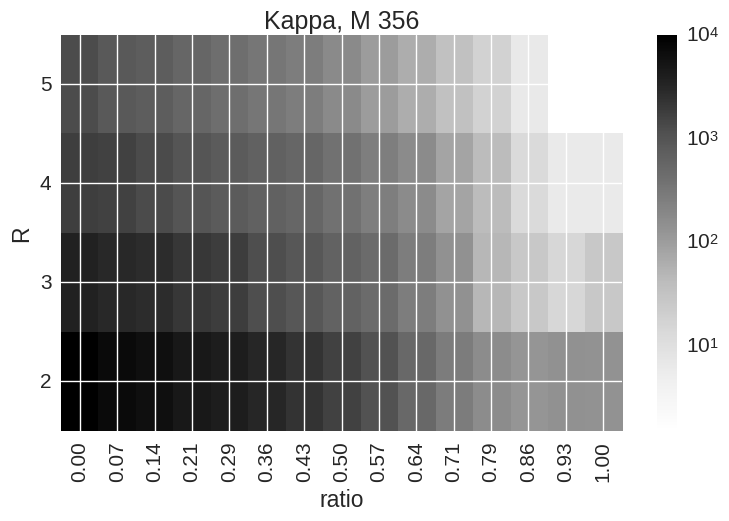

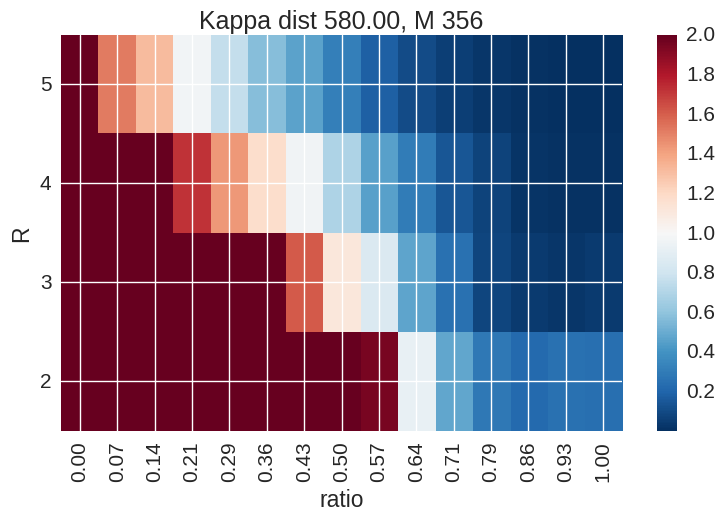

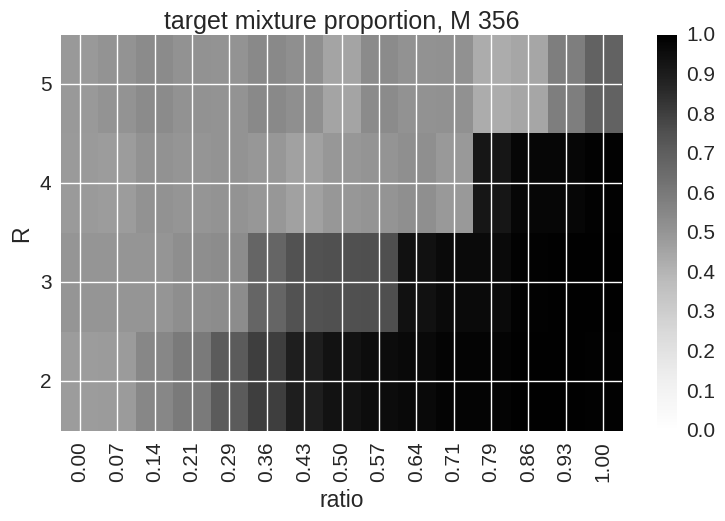

In [15]:
%cd /nfs/data3/lmatthey/visual_working_mem/paper_theory_revisions/higher_dimensions_R/
with io.capture_output(display=False, stdout=True) as captured:
    %run reloader_normalizedsigmax_highdimensional_papercomments_190714.py

---



# Other plots for this chapter come from: [fisherinfo_new_2016/notebook_fisher_fits_2016.ipynb](../fisherinfo_new_2016/notebook_fisher_fits_2016.ipynb)
